In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# turn of warning messages
pd.options.mode.chained_assignment = None  # default='warn'

# get data
df = pd.read_csv('https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/notebooks/Ch01_Machine_Learning_Basics/student_records.csv')

In [2]:
df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


## Data preparation
Feature extraction and engineering

In [3]:
# get features and corresponding outcomes
feature_names = ['OverallGrade', 'Obedient', 'ResearchScore', 'ProjectScore']
training_features = df[feature_names]

outcome_name = ['Recommend']
outcome_labels = df[outcome_name]

In [4]:
# view features
training_features

,OverallGrade,Obedient,ResearchScore,ProjectScore
0,A,Y,90,85
1,C,N,85,51
2,F,N,10,17
3,B,Y,75,71
4,E,N,20,30
5,A,Y,92,79
6,B,Y,60,59
7,C,Y,75,33


In [5]:
# view outcome labels
outcome_labels

,Recommend
0,Yes
1,Yes
2,No
3,No
4,No
5,Yes
6,No
7,No


In [6]:
# list down features based on type
numeric_feature_names = ['ResearchScore', 'ProjectScore']
categoricial_feature_names = ['OverallGrade', 'Obedient']

## Engineering Categorical Features

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['OverallGrade', 'Obedient'])], remainder='passthrough')
training_features = np.array(ct.fit_transform(training_features))

In [8]:
print(training_features)

[[ 1.  0.  0.  0.  0.  0.  1. 90. 85.]
 [ 0.  0.  1.  0.  0.  1.  0. 85. 51.]
 [ 0.  0.  0.  0.  1.  1.  0. 10. 17.]
 [ 0.  1.  0.  0.  0.  0.  1. 75. 71.]
 [ 0.  0.  0.  1.  0.  1.  0. 20. 30.]
 [ 1.  0.  0.  0.  0.  0.  1. 92. 79.]
 [ 0.  1.  0.  0.  0.  0.  1. 60. 59.]
 [ 0.  0.  1.  0.  0.  0.  1. 75. 33.]]


In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# fit scaler on training features
ss.fit(training_features)

# scale numeric features now
training_features = ss.transform(training_features)

# view updated featureset
training_features

array([[ 1.73205081, -0.57735027, -0.57735027, -0.37796447, -0.37796447,
        -0.77459667,  0.77459667,  0.89958341,  1.37664985],
       [-0.57735027, -0.57735027,  1.73205081, -0.37796447, -0.37796447,
         1.29099445, -1.29099445,  0.73064756, -0.09177666],
       [-0.57735027, -0.57735027, -0.57735027, -0.37796447,  2.64575131,
         1.29099445, -1.29099445, -1.80339021, -1.56020317],
       [-0.57735027,  1.73205081, -0.57735027, -0.37796447, -0.37796447,
        -0.77459667,  0.77459667,  0.39277585,  0.77200364],
       [-0.57735027, -0.57735027, -0.57735027,  2.64575131, -0.37796447,
         1.29099445, -1.29099445, -1.46551851, -0.99874597],
       [ 1.73205081, -0.57735027, -0.57735027, -0.37796447, -0.37796447,
        -0.77459667,  0.77459667,  0.96715775,  1.11751576],
       [-0.57735027,  1.73205081, -0.57735027, -0.37796447, -0.37796447,
        -0.77459667,  0.77459667, -0.1140317 ,  0.25373546],
       [-0.57735027, -0.57735027,  1.73205081, -0.37796447, -0

## Encoding the outcome_labels

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
outcome_labels = le.fit_transform(outcome_labels)

C:\Users\selor\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
print(outcome_labels)

[1 1 0 0 0 1 0 0]


## Modeling 

In [12]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# fit the model
model = LogisticRegression() 
model.fit(training_features,outcome_labels)
# view model parameters
model


LogisticRegression()

## Model Evaluation

In [13]:
# simple evaluation on training data
pred_labels = model.predict(training_features)
actual_labels = (outcome_labels)

# evaluate model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy:', float(accuracy_score(actual_labels, pred_labels))*100, '%')
print('Classification Stats:')
print(classification_report(actual_labels, pred_labels))

Accuracy: 100.0 %
Classification Stats:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



[[5 0]
 [0 3]]


<AxesSubplot:>

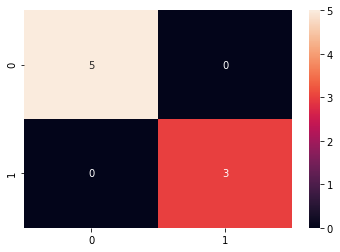

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(actual_labels, pred_labels)
print(cm)
accuracy_score(actual_labels, pred_labels)
sns.heatmap(cm, annot=True)

In [15]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


## Model Deployment

In [25]:
import joblib
import os
# save models to be deployed on your server
if not os.path.exists('Model'):
    os.mkdir('Model')
if not os.path.exists('Scaler'):
    os.mkdir('Scaler') 
    
joblib.dump(model, r'Model/model.pickle') 
joblib.dump(ss, r'Scaler/scaler.pickle')


    



['Scaler/scaler.pickle']

## Prediction in Action

In [26]:
# load model and scaler objects
# load model and scaler objects
model = joblib.load(r'Model/model.pickle')
scaler = joblib.load(r'Scaler/scaler.pickle')


In [70]:
## data retrieval
new_data = pd.DataFrame([{'Name': 'Nathan', 'OverallGrade': 'F', 'Obedient': 'N', 'ResearchScore': 30, 'ProjectScore': 20},
                  {'Name': 'Thomas', 'OverallGrade': 'A', 'Obedient': 'Y', 'ResearchScore': 78, 'ProjectScore': 80},
                  {'Name': 'Johnny', 'OverallGrade': 'A', 'Obedient': 'Y', 'ResearchScore': 68, 'ProjectScore': 70},
{'Name': 'Mark', 'OverallGrade': 'A', 'Obedient': 'Y', 'ResearchScore': 87, 'ProjectScore': 88},
{'Name': 'Moses', 'OverallGrade': 'D', 'Obedient': 'N', 'ResearchScore': 58, 'ProjectScore': 60},
{'Name': 'Peter', 'OverallGrade': 'E', 'Obedient': 'Y', 'ResearchScore': 48, 'ProjectScore': 46},
{'Name': 'Ofori', 'OverallGrade': 'A', 'Obedient': 'N', 'ResearchScore': 98, 'ProjectScore': 85},
{'Name': 'Timmy', 'OverallGrade': 'C', 'Obedient': 'N', 'ResearchScore': 78, 'ProjectScore': 48}])
new_data = new_data[['Name', 'OverallGrade', 'Obedient', 'ResearchScore', 'ProjectScore']]
new_data

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore
0,Nathan,F,N,30,20
1,Thomas,A,Y,78,80
2,Johnny,A,Y,68,70
3,Mark,A,Y,87,88
4,Moses,D,N,58,60
5,Peter,E,Y,48,46
6,Ofori,A,N,98,85
7,Timmy,C,N,78,48


In [71]:
prediction_features = new_data[feature_names]

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['OverallGrade', 'Obedient'])], remainder='passthrough')
prediction_features = np.array(ct.fit_transform(prediction_features))

In [73]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# fit scaler on training features
ss.fit(prediction_features)

# scale numeric features now
prediction_features = ss.transform(prediction_features)

# view updated featureset
prediction_features

array([[-1.        , -0.37796447, -0.37796447, -0.37796447,  2.64575131,
         1.        , -1.        , -1.84800976, -1.92956149],
       [ 1.        , -0.37796447, -0.37796447, -0.37796447, -0.37796447,
        -1.        ,  1.        ,  0.47866482,  0.81877535],
       [ 1.        , -0.37796447, -0.37796447, -0.37796447, -0.37796447,
        -1.        ,  1.        , -0.00605905,  0.36071921],
       [ 1.        , -0.37796447, -0.37796447, -0.37796447, -0.37796447,
        -1.        ,  1.        ,  0.91491631,  1.18522026],
       [-1.        , -0.37796447,  2.64575131, -0.37796447, -0.37796447,
         1.        , -1.        , -0.49078292, -0.09733693],
       [-1.        , -0.37796447, -0.37796447,  2.64575131, -0.37796447,
        -1.        ,  1.        , -0.97550679, -0.73861553],
       [ 1.        , -0.37796447, -0.37796447, -0.37796447, -0.37796447,
         1.        , -1.        ,  1.44811256,  1.04780342],
       [-1.        ,  2.64575131, -0.37796447, -0.37796447, -0

In [74]:
## predict using model
## predict using model
predictions = model.predict(prediction_features)

## display results
new_data['Recommend'] = predictions
new_data



,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Nathan,F,N,30,20,0
1,Thomas,A,Y,78,80,1
2,Johnny,A,Y,68,70,0
3,Mark,A,Y,87,88,1
4,Moses,D,N,58,60,0
5,Peter,E,Y,48,46,0
6,Ofori,A,N,98,85,1
7,Timmy,C,N,78,48,0
